In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Preprocessing and model libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier      #DecisionTreeClassifier & DecisionTreeRegressor

#Evaluation libraries
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.metrics import roc_curve, auc

In [2]:
#Creating the dataframe

df = pd.read_csv('bank.csv')

In [3]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


#### Preprocessin and visualization of the dataset

In [4]:
#Checking for null values:

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

<AxesSubplot:>

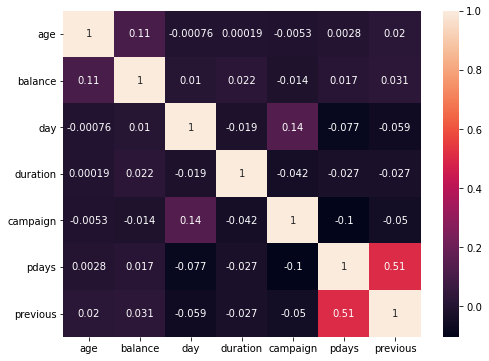

In [5]:
#Visualizing correlation map

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot= True)

In [6]:
#Creating encoded features and implementing it on the copy of the original df

res_df=df.copy()
le= LabelEncoder()

In [7]:
# Here all the categorical variables are encoded before they are splitted into training and test
# Hence a single code of fit_transform is used for it

res_df['job']=le.fit_transform(res_df['job'])
res_df['marital']=le.fit_transform(res_df['marital'])
res_df['education']=le.fit_transform(res_df['education'])
res_df['default']=le.fit_transform(res_df['default'])
res_df['housing']=le.fit_transform(res_df['housing'])
res_df['loan']=le.fit_transform(res_df['loan'])
res_df['contact']=le.fit_transform(res_df['contact'])
res_df['month']=le.fit_transform(res_df['month'])
res_df['poutcome']=le.fit_transform(res_df['poutcome'])
res_df['deposit']=le.fit_transform(res_df['deposit'])
res_df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1


#### Train_test_split, model instantiation and fitting

In [8]:
# Train test split
# All the columns except deposit become the X and deposit is labeled as Y

X = res_df.drop(['deposit'],axis=1)
Y=res_df['deposit']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [9]:
# Instatiating the DecisionTreeClassifer model , with a fixed random state and max_depth

model=DecisionTreeClassifier(random_state=42,max_depth=4)    #constraint

In [10]:
# fit the DecisionTreeClassifeir model on the train dataset

dt=model.fit(X_train,y_train)

In [12]:
#Predict the output variable value for the X test dataset
y_pred=dt.predict(X_test)

In [14]:
y_pred_proba = dt.predict_proba(X_test)[::,1]    #[0.25 to be labeled as 0, 0.75 to be labeld as 1]   


#### Evaluation of the model

In [16]:
print(accuracy_score(y_test,y_pred))


0.787281683833408


<AxesSubplot:>

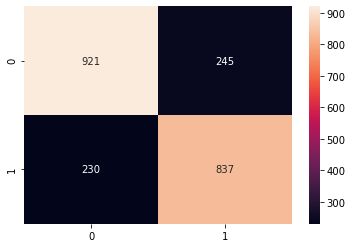

In [22]:
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot = True , fmt="3")

In [ ]:
# classification: recall, precision, F1 score , Accuracy 

print(classification_report(y_test,y_pred))

In [ ]:
# Plotting the Decision Tree

from sklearn import tree
df1=pd.DataFrame(res_df.drop(['deposit'],axis=1))
column_names=list(df1.columns)
fn=column_names
cn=['Not deposited','deposited']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=300)

tree.plot_tree(model,
           feature_names = fn, 
           class_names=cn,
           filled = True);

fig.savefig('DecisionTree.png')

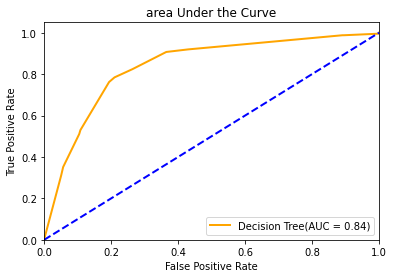

In [19]:
#Plotting the AUROC curve

plt.figure(1)
lw=2
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_proba)
roc_auc_dt = auc(fpr_dt,tpr_dt)
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")